#  Markov Chain: Steady State & Eigenvector

---

### Why do we do this?

A Markov Chain with a **fixed transition matrix** will, under mild conditions (e.g., irreducibility, aperiodicity), always converge to a unique **steady-state distribution**.  
This means that, in the long run, the probabilities of being in each state stop changing.

---

### What does the theorem say?

- The steady-state vector $\pi$ satisfies:
  $
  \pi T = \pi
  \quad \text{and} \quad \sum_i \pi_i = 1
  $

- Mathematically, this means the steady state is the **eigenvector** of the transition matrix with eigenvalue 1.

---

### Why does this matter?

Understanding the steady-state distribution tells us:
- What the long-term behavior will be if the system runs indefinitely.
- How often we expect the system to be in each state.
- How robust the chain is to its initial state (in the long run, the initial state does not matter).

In real applications, this principle is the backbone of:
- Web search ranking (Google PageRank)
- Population migration modeling
- Brand loyalty and retention analysis

---

### How will we verify this?

We will do it in **three steps**:
1. **Numerical Iteration**: Simulate repeated steps to see convergence.
2. **Closed-Form Solution**: Solve $\pi T = \pi$ symbolically to get the exact result.
3. **Eigenvector Check**: Use matrix algebra to find the eigenvector with eigenvalue 1 and compare.

If all three match, we prove our understanding is correct.

---

### Expected Outcome

The numerically converged distribution ≈ the algebraic solution ≈ the eigenvector for λ = 1.

This shows how **local transition rules** combine over infinite time to shape a unique stable distribution —  
which is the true power of the Markov Chain model.



In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
T = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.5, 0.2],
    [0.2, 0.3, 0.5]
])

P0 = np.array([1, 0, 0])
P_history = [P0]

In [7]:
steps = 50

for _ in range(steps):
    P_next = P_history[-1] @ T
    P_history.append(P_next)

P_history = np.array(P_history)

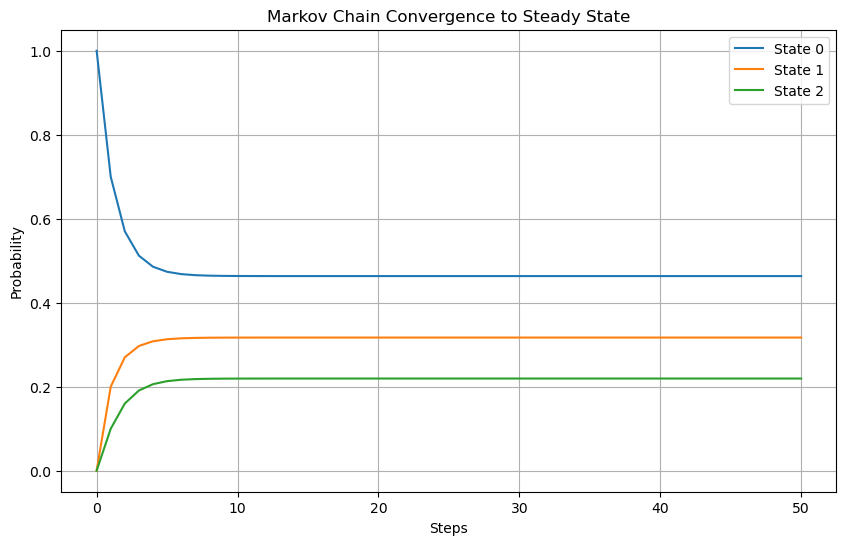

In [9]:
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(P_history[:, i], label=f'State {i}')
plt.title('Markov Chain Convergence to Steady State')
plt.xlabel('Steps')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import sympy as sp

In [11]:
p1, p2, p3 = sp.symbols('p1 p2 p3')

In [13]:
eq1 = sp.Eq(0.7*p1 + 0.3*p2 + 0.2*p3, p1)
eq2 = sp.Eq(0.2*p1 + 0.5*p2 + 0.3*p3, p2)

eq_sum = sp.Eq(p1 + p2 + p3, 1)

solution = sp.solve([eq1, eq2, eq_sum], (p1, p2, p3), dict=True)
solution

[{p1: 0.463414634146341, p2: 0.317073170731707, p3: 0.219512195121951}]

In [15]:
eigvals, eigvecs = np.linalg.eig(T.T)

for i, val in enumerate(eigvals):
    if np.isclose(val, 1):
        steady_vec = eigvecs[:, i].real
        steady_vec = steady_vec / np.sum(steady_vec)  # Normalize
        print("Eigenvector for λ=1:", steady_vec)

Eigenvector for λ=1: [0.46341463 0.31707317 0.2195122 ]


## Interpretation: Markov Chain Steady State

---

### What did we do?

In this notebook, we verified the **Steady State** property of a fixed Markov Chain  
using three complementary ways:

️1. **Numerical Iteration**  
   We applied the transition matrix repeatedly,  
   showing how an initial state distribution evolves over many steps  
   and stabilizes into a fixed distribution.

️2. **Closed-Form Solution**  
   We solved the system  $\pi T = \pi$ with the normalization condition  
   $\sum_i \pi_i = 1$.  
   This gives us the exact theoretical steady-state distribution.

️3. **Eigenvector Check**  
   We found the eigenvector of the transposed matrix $T^T$  
   with eigenvalue λ = 1 and normalized it to sum to 1,  
   verifying that it matches the other results.

---

### Key Points

- The steady state is the **unique probability vector** that remains unchanged by the transition.
- This vector is mathematically the **left eigenvector** of the transition matrix for λ = 1.
- No matter the initial distribution, the Markov Chain will converge to this steady state  
  if the matrix is irreducible and aperiodic.

---

### Takeaway

> **This shows the power of local rules → global behavior.**  
> The simple act of repeating a fixed transition rule over and over  
> is enough to generate a predictable long-term distribution,  
> which you can prove algebraically and check numerically.

This insight is a foundation for everything from  
**Google PageRank** to **stochastic models in energy, population, and risk.**

